# Analysis of Datasets to Explore Connections and Correlations Related To:
## 1. Sleep duration and feelings of tiredness
## 2. Prescription medication use on sleep habits

#### analysis performed by Brittany Thomas

In [2]:
import pandas as pd # type: ignore
from pathlib import Path
import pyreadstat  # type: ignore

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
#read in Final Cleaned dataset for exploratory analyasis of stated variables
finaldata = pd.read_csv("Datasets/Final_Cleaned") 
finaldata

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,0.0
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,NaN,1.0,40.0,4.0,5.0,3.82,NaN,NaN,NaN,NaN,420.0,6.0,7.0,2.0,2.0
15556,124819.0,NaN,1.0,2.0,4.0,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820.0,NaN,2.0,7.0,3.0,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821.0,4.0,1.0,63.0,4.0,2.0,3.71,10.0,NaN,NaN,NaN,60.0,8.0,9.0,2.0,2.0


In [295]:
#Added dictionary to clean up race data
race_dict = {
    1.0 : "Mex-Am",
    2.0 : "Other Hisp",
    3.0 : "White",
    4.0 : "Black", 
    6.0 : "Asian",
    7.0 : "Other/Multi",
    
}
finaldata["Race"] = finaldata["Race"].map(race_dict)


### Analysis of sleep quality vs duration of sleep on weekdays
#### Does amount of sleep influence reported sleep quality (frequency of feeling tired during the day)?

Performed ANOVA 
Description: Comparison of frequency with which respondents reported feeling tired and sleep hours during the week

Frequency of feeling tired:
0 = Never
1 = Rarely
2 = Sometimes
3 = Often
4 = Almost Always

Sleep Duration range from 2-14 hours

In [296]:
#extracted columns of interest to create dataframe to set up anova for first analysis
qualquant_df = finaldata[['Feeling Tired During Day Frequency', 'Sleep Hours Week/Workdays']]
qualquant_df = qualquant_df.dropna()
qualquant_df

,Feeling Tired During Day Frequency,Sleep Hours Week/Workdays
3,0.0,7.5
4,2.0,8.0
5,1.0,8.5
8,3.0,10.0
10,2.0,6.5
...,...,...
15552,1.0,6.0
15554,1.0,8.0
15555,2.0,6.0
15558,2.0,8.0


In [297]:
# Extract individual groups
#Frequency of feeling tired: 0 = Never, 1 = Rarely, 2 = Sometimes, 3 = Often, 4 = Almost Always
group0 = qualquant_df[qualquant_df["Feeling Tired During Day Frequency"] == 0]["Sleep Hours Week/Workdays"]
group1 = qualquant_df[qualquant_df["Feeling Tired During Day Frequency"] == 1]["Sleep Hours Week/Workdays"]
group2 = qualquant_df[qualquant_df["Feeling Tired During Day Frequency"] == 2]["Sleep Hours Week/Workdays"]
group3 = qualquant_df[qualquant_df["Feeling Tired During Day Frequency"] == 3]["Sleep Hours Week/Workdays"]
group4 = qualquant_df[qualquant_df["Feeling Tired During Day Frequency"] == 4]["Sleep Hours Week/Workdays"]

In [298]:
# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4)

F_onewayResult(statistic=17.963359116910482, pvalue=1.0396356338491968e-14)

#### A correlation was identified between duration of sleep (hours) during weekdays and frequency with which respondents reported feeling tired during the day.

In [299]:
#Added dictionary to clean up frequency of feeling tired data
tired_dict = {
    0.0 : "Never",
    1.0 : "Rarely",
    2.0 : "Sometimes",
    3.0 : "Often", 
    4.0 : "Almost always",
    7.0 : "Other",
    9.0 : "Other",
        
}
finaldata["Feeling Tired During Day Frequency"] = finaldata["Feeling Tired During Day Frequency"].map(tired_dict)
finaldata.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,Asian,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,Mex-Am,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,White,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,Asian,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,Never
4,109267.0,1.0,2.0,21.0,Other Hisp,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,Sometimes


In [300]:
#generated dataframe to to create visual for presentation
show_df = finaldata[["Sleep Hours Week/Workdays", "Feeling Tired During Day Frequency"]].dropna()
show_df

,Sleep Hours Week/Workdays,Feeling Tired During Day Frequency
3,7.5,Never
4,8.0,Sometimes
5,8.5,Rarely
8,10.0,Often
10,6.5,Sometimes
...,...,...
15552,6.0,Rarely
15554,8.0,Rarely
15555,6.0,Sometimes
15558,8.0,Sometimes


In [301]:
df1 = show_df.loc[(show_df["Feeling Tired During Day Frequency"] == 'Never'), :]
df1.head()

,Sleep Hours Week/Workdays,Feeling Tired During Day Frequency
3,7.5,Never
11,9.5,Never
21,8.0,Never
28,11.0,Never
32,7.0,Never


In [302]:
#provides evidence there may be a correlation between sleep duration and feelings of tiredness; visuals were created after 
#the ANOVA calculation was performed to take advantage of the dictionaries being read in 
df2 = show_df.loc[(show_df["Feeling Tired During Day Frequency"] == 'Almost always'), :]
df2.head()

,Sleep Hours Week/Workdays,Feeling Tired During Day Frequency
22,7.5,Almost always
35,6.0,Almost always
52,5.0,Almost always
79,6.5,Almost always
104,10.5,Almost always


In [303]:
#added gender dictionary to clean up data
Gender_dict = {1.0 : "Male",2.0:"Female"}

finaldata["Gender"] = finaldata["Gender"].map(Gender_dict)


In [304]:
#added educational dictionary to clean up data
edu_dict = {
    1.0 : "Less than 9th grade",
    2.0 : "9-11th grade",
    3.0 : "HS grad/GED",
    4.0 : "Some college", 
    5.0 : "College grad+",
    7.0 : "Other",
    9.0 : "Other"
}
finaldata["Educational Attainment"] = finaldata["Educational Attainment"].map(edu_dict)


In [305]:
#added sleep issue dictionary to clean up data
sleepissue_dict = {
    1.0 : "Yes", 
    2.0 : "No", 
    7.0 : "Other", 
    9.0 : "Other"
}
finaldata["Told Doctor About Sleep Issues"] = finaldata["Told Doctor About Sleep Issues"].map(sleepissue_dict)


In [306]:
#check of final data cleaned up
finaldata

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,Male,2.0,Asian,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,Female,13.0,Mex-Am,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,Male,2.0,White,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,Female,29.0,Asian,College grad+,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,No,Never
4,109267.0,1.0,Female,21.0,Other Hisp,Some college,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,No,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,NaN,Male,40.0,Black,College grad+,3.82,NaN,NaN,NaN,NaN,420.0,6.0,7.0,No,Sometimes
15556,124819.0,NaN,Male,2.0,Black,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820.0,NaN,Female,7.0,White,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821.0,4.0,Male,63.0,Black,9-11th grade,3.71,10.0,NaN,NaN,NaN,60.0,8.0,9.0,No,Sometimes


# Additional Data Analysis

Preliminary statistics and attributes of the sleep data were obtained. Additionally, sleep hours were grouped into 4 categories for futher analysis under Sleep Hours Week/Workdays and Sleep Hours Weekends

## Total Hours of Sleep Analysis
To compare the distribution of total hours slept during weekdays and weekends, pie charts were created and displayed side by side. 
1. Most respondents get moderate (5-8hrs) sleep on both weekdays and weekends. 
2. Comparing the two pie charts, a greater percentage of respondents get longer periods of sleep on the weekends than the weekdays overall. The category that appears to see the greatest reduction in number of respondents appears to be the moderate sleepers.

This suggests a subset of respondents get moderate sleep during the workweek and longer periods of sleep on the weekends.
Further analysis could specifically compare respondents answers to plot the change (delta) between workday and weekend.

In [307]:
#used describe() to obtain an overview of sleep hour data
finaldata[['Sleep Hours Week/Workdays', 'Sleep Hours Weekends']].describe()

,Sleep Hours Week/Workdays,Sleep Hours Weekends
count,10105.000000,10099.000000
mean,7.640920,8.361768
std,1.682628,1.824088
min,2.000000,2.000000
25%,7.000000,7.000000
50%,7.500000,8.000000
75%,8.500000,9.500000
max,14.000000,14.000000


In [308]:
#used unique function to display unique inputs for categorization into categorical groups (short, moderate, long, extensive)
finaldata['Sleep Hours Week/Workdays'].unique()


array([ nan,  7.5,  8. ,  8.5, 10. ,  6.5,  9.5,  9. ,  7. ,  4. , 11. ,
        4.5,  6. ,  5. , 12. , 10.5,  5.5,  2. ,  3. ,  3.5, 14. , 13. ,
       11.5, 13.5, 12.5])

In [309]:
finaldata['Sleep Hours Weekends'].unique()

array([ nan,  8. , 13. ,  9.5, 10. ,  9. ,  4. ,  4.5,  6.5,  7. , 14. ,
       11. ,  7.5,  5. , 10.5, 12. ,  8.5,  6. ,  5.5, 11.5, 12.5,  2. ,
        3. ,  3.5, 13.5])

In [310]:
print(finaldata['Sleep Hours Week/Workdays'].mode())
print(finaldata['Sleep Hours Weekends'].mode())

0    8.0
Name: Sleep Hours Week/Workdays, dtype: float64
0    8.0
Name: Sleep Hours Weekends, dtype: float64


In [311]:
# determined equal ranges as follows:
# 2-5 = short
# 5.1-8 = moderate
# 8.1-11 = long
# 11.1 - 14 = extensive
# mean, median, and mode all fall close to moderate/long boundary

#added columns to convert hours slept into categories
weekhrs = pd.cut(finaldata['Sleep Hours Week/Workdays'], [2,5,8,11,14], labels=["short", "moderate", "long", "extensive"])

In [312]:
finaldata['Workweek Sleep Hours'] = weekhrs

In [313]:
weekendhrs = pd.cut(finaldata['Sleep Hours Weekends'], [2,5,8,11,14], labels=["short", "moderate", "long", "extensive"])
finaldata['Weekend Sleep Hours'] = weekendhrs
finaldata.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency,Workweek Sleep Hours,Weekend Sleep Hours
0,109263.0,NaN,Male,2.0,Asian,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,Female,13.0,Mex-Am,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,Male,2.0,White,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,Female,29.0,Asian,College grad+,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,No,Never,moderate,moderate
4,109267.0,1.0,Female,21.0,Other Hisp,Some college,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,No,Sometimes,moderate,moderate


In [314]:
weekhours = finaldata['Workweek Sleep Hours'].value_counts()
weekhours

Workweek Sleep Hours
moderate     6143
long         2980
short         759
extensive     177
Name: count, dtype: int64

In [315]:
weekendhours = finaldata['Weekend Sleep Hours'].value_counts()
weekendhours

Weekend Sleep Hours
moderate     4551
long         4529
short         524
extensive     471
Name: count, dtype: int64

### Create visuals to compare data

#### 1. side-by-side pie charts using the plt.subplots() were generated to compare weekday to weekend hours slept
#### 2. individual "embedded" pie charts created for short, moderate, long and extensive sleep groups to display prescription medication use distributions
#### 3. statistical analysis performed to see if there is statistical significance between the prescription medication use in the extensive sleep group vs the other sleep groups (who had similar distributions based on their means)

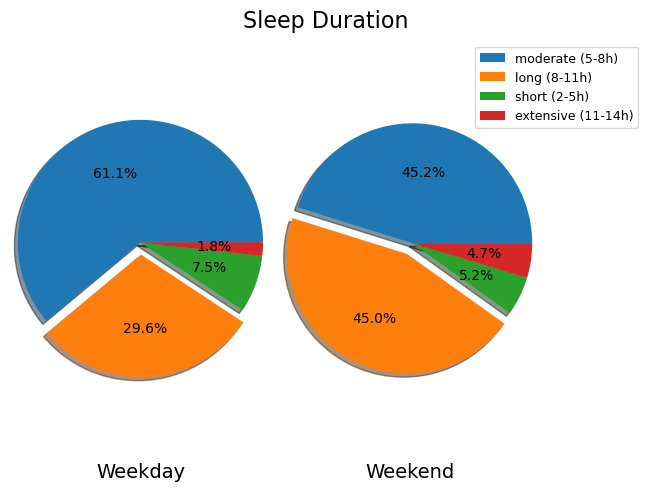

In [337]:
# Used plt.subplots () to create side-by-side pie charts to show comparison of data; formatted to look nice
# Equal aspect ratio ensures that pie is drawn as a circle
# Shadow = True adds dimension
# Explode feature draws attention to the piece that had the most significant change (long sleep duration)
# Percentages added for readability

# make figure with subplots to show pie charts side by side
# set the spacing between subplots using constrained_layout = True
# create legend in upper right with loc and bbox parameters so it doesn't overlap with the pie charts

labels = 'moderate (5-8h)', 'long (8-11h)', 'short (2-5h)', 'extensive (11-14h)'

explode = explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots(1,2, constrained_layout = True)
ax1[0].pie(weekhours, explode=explode, autopct='%1.1f%%',
        shadow=True)
ax1[1].pie(weekendhours, explode=explode, autopct='%1.1f%%',
        shadow=True)
ax1[0].axis('equal')
ax1[0].set_xlabel('Weekday', fontsize=14)
ax1[1].axis('equal')
ax1[1].set_xlabel('Weekend', fontsize=14)
fig1.suptitle('Sleep Duration', fontsize=16)
plt.legend(labels, fontsize=9, bbox_to_anchor=(1.4, 1), loc = "upper right")                                                                                                                                        
plt.show()

## Effect of Prescription Medication Use on Sleep Patterns

In [338]:
finaldata.columns

Index(['Respondent ID', 'Number of Rx Meds', 'Gender', 'Age at Screening',
       'Race', 'Educational Attainment', 'Family Income to Poverty Ratio',
       'Minutes of Vigorous Work Daily', 'Minutes of Moderate Work Daily',
       'Minutes of Vigorous Recreation Daily',
       'Minutes of Moderate Recreation Daily',
       'Minutes of Sedentary Activity Daily', 'Sleep Hours Week/Workdays',
       'Sleep Hours Weekends', 'Told Doctor About Sleep Issues',
       'Feeling Tired During Day Frequency', 'Workweek Sleep Hours',
       'Weekend Sleep Hours'],
      dtype='object')

In [339]:
# performed describe() to get a feel for how to categorize the rx data
# chose to categorize into 3 groups: no meds taken, one medication taken and >1 medication taken

finaldata['Number of Rx Meds'].describe()

count    6844.000000
mean        3.542665
std         2.986857
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        22.000000
Name: Number of Rx Meds, dtype: float64

In [340]:
#created dataframes representing all respondents who indicated they take 1, 0 or >1 rx meds
rx_one = finaldata.loc[(finaldata['Number of Rx Meds'] == 1),:]
rx_one

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency,Workweek Sleep Hours,Weekend Sleep Hours
4,109267.0,1.0,Female,2.100000e+01,Other Hisp,Some college,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,No,Sometimes,moderate,moderate
5,109268.0,1.0,Female,1.800000e+01,White,NaN,1.66,540.0,300.0,NaN,NaN,540.0,8.5,8.0,No,Rarely,long,moderate
15,109278.0,1.0,Female,6.000000e+00,Other Hisp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,109281.0,1.0,Female,5.397605e-79,Mex-Am,NaN,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,109286.0,1.0,Female,3.300000e+01,Asian,College grad+,1.36,NaN,NaN,NaN,NaN,420.0,8.5,9.0,No,Sometimes,long,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15532,124795.0,1.0,Female,5.000000e+00,Other Hisp,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15543,124806.0,1.0,Female,4.000000e+00,Black,NaN,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15545,124808.0,1.0,Female,2.600000e+01,White,HS grad/GED,NaN,60.0,NaN,NaN,NaN,600.0,7.5,7.5,Yes,Almost always,moderate,moderate
15546,124809.0,1.0,Female,2.300000e+01,Mex-Am,Some college,4.34,NaN,240.0,NaN,NaN,300.0,7.0,10.0,Yes,Often,moderate,long


In [341]:
rx_one['Number of Rx Meds'].value_counts()

Number of Rx Meds
1.0    2200
Name: count, dtype: int64

In [342]:
#pulled null values b/c this represents anyone who did NOT answer yes to takes rx meds. 8701/8716 entered "no" as a response. The other 15 entered don't know or refused to enter. This is negligible and/or can still be included in the "not known to be taking meds" category.
rx_zero = finaldata.loc[finaldata['Number of Rx Meds'].isnull()]
rx_zero

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency,Workweek Sleep Hours,Weekend Sleep Hours
0,109263.0,NaN,Male,2.0,Asian,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,Female,13.0,Mex-Am,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,Male,2.0,White,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,Female,29.0,Asian,College grad+,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,No,Never,moderate,moderate
7,109270.0,NaN,Female,11.0,Black,NaN,1.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15552,124815.0,NaN,Male,52.0,Black,Some college,5.00,360.0,NaN,120.0,120.0,60.0,6.0,6.0,No,Rarely,moderate,moderate
15553,124816.0,NaN,Male,1.0,Mex-Am,NaN,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15555,124818.0,NaN,Male,40.0,Black,College grad+,3.82,NaN,NaN,NaN,NaN,420.0,6.0,7.0,No,Sometimes,moderate,moderate
15556,124819.0,NaN,Male,2.0,Black,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
rx_morethanone = finaldata.loc[(finaldata['Number of Rx Meds'] > 1),:]
rx_morethanone

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency,Workweek Sleep Hours,Weekend Sleep Hours
6,109269.0,2.0,Male,2.0,Other Hisp,NaN,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109271.0,3.0,Male,49.0,White,9-11th grade,NaN,NaN,120.0,NaN,NaN,60.0,10.0,13.0,Yes,Often,long,extensive
10,109273.0,3.0,Male,36.0,White,Some college,0.83,240.0,NaN,NaN,120.0,180.0,6.5,8.0,Yes,Sometimes,moderate,moderate
11,109274.0,7.0,Male,68.0,Other/Multi,Some college,1.20,480.0,360.0,NaN,60.0,300.0,9.5,9.5,No,Never,long,long
12,109275.0,2.0,Male,6.0,White,NaN,3.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15548,124811.0,3.0,Male,76.0,White,College grad+,5.00,NaN,120.0,60.0,60.0,240.0,8.0,8.0,No,Rarely,moderate,moderate
15549,124812.0,4.0,Female,62.0,Other Hisp,Some college,5.00,NaN,NaN,NaN,NaN,240.0,7.0,8.0,Yes,Often,moderate,moderate
15554,124817.0,10.0,Female,67.0,Mex-Am,9-11th grade,2.19,10.0,NaN,NaN,NaN,180.0,8.0,8.0,No,Rarely,moderate,moderate
15558,124821.0,4.0,Male,63.0,Black,9-11th grade,3.71,10.0,NaN,NaN,NaN,60.0,8.0,9.0,No,Sometimes,moderate,long


In [344]:
#created variables to make future analysis and visualization easier

morethanone_short = finaldata.loc[(finaldata['Number of Rx Meds'] > 1)&(finaldata['Workweek Sleep Hours'] == 'short'),:]
morethanone_mod = finaldata.loc[(finaldata['Number of Rx Meds'] > 1)&(finaldata['Workweek Sleep Hours'] == 'moderate'),:]
morethanone_long = finaldata.loc[(finaldata['Number of Rx Meds'] > 1)&(finaldata['Workweek Sleep Hours'] == 'long'),:]
morethanone_ext = finaldata.loc[(finaldata['Number of Rx Meds'] > 1)&(finaldata['Workweek Sleep Hours'] == 'extensive'),:]

one_short = finaldata.loc[(finaldata['Number of Rx Meds'] == 1)&(finaldata['Workweek Sleep Hours'] == 'short'),:]
one_mod = finaldata.loc[(finaldata['Number of Rx Meds'] == 1)&(finaldata['Workweek Sleep Hours'] == 'moderate'),:]
one_long = finaldata.loc[(finaldata['Number of Rx Meds'] == 1)&(finaldata['Workweek Sleep Hours'] == 'long'),:]
one_ext = finaldata.loc[(finaldata['Number of Rx Meds'] == 1)&(finaldata['Workweek Sleep Hours'] == 'extensive'),:]

zero_short = finaldata.loc[(finaldata['Number of Rx Meds'].isnull())&(finaldata['Workweek Sleep Hours'] == 'short'),:]
zero_mod = finaldata.loc[(finaldata['Number of Rx Meds'].isnull())&(finaldata['Workweek Sleep Hours'] == 'moderate'),:]
zero_long = finaldata.loc[(finaldata['Number of Rx Meds'].isnull())&(finaldata['Workweek Sleep Hours'] == 'long'),:]
zero_ext = finaldata.loc[(finaldata['Number of Rx Meds'].isnull())&(finaldata['Workweek Sleep Hours'] == 'extensive'),:]

In [345]:
sum_moderate = len(morethanone_mod) + len(one_mod) + len(zero_mod)

In [346]:
sum_long = len(morethanone_long) + len(one_long) + len(zero_long)
sum_long

2980

In [347]:
sum_short = len(morethanone_short) + len(one_short) + len(zero_short)
sum_short

759

In [348]:
sum_extensive = len(morethanone_ext) + len(one_ext) + len(zero_ext)
sum_extensive

177

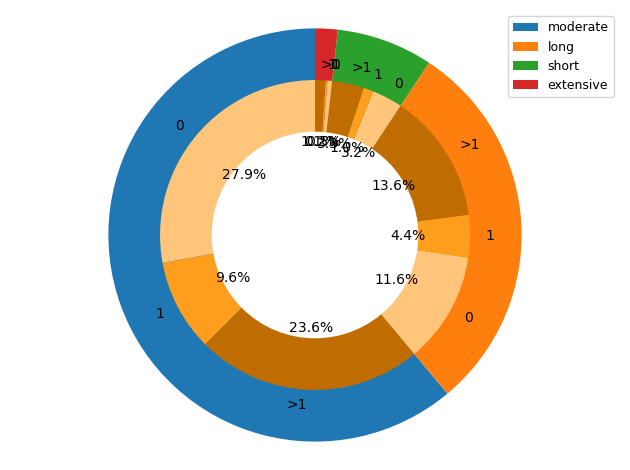

In [349]:
# First attempt at comparative pie chart using weekday sleep hours and number of prescription medications taken data
# It did not look nice so I switched to single variable visualizations below
# Data to plot
labels = ['moderate', 'long', 'short', 'extensive']
label_sizes = [sum_moderate, sum_long, sum_short, sum_extensive]
labels_rx = ['0','1','>1','0','1','>1','0','1', '>1', '0', '1', '>1']
sizes_rx = [len(zero_mod), len(one_mod), len(morethanone_mod),
            len(zero_long), len(one_long), len(morethanone_long),
            len(zero_short), len(one_short), len(morethanone_short),
            len(zero_ext), len(one_ext), len(morethanone_ext)]

colors_rx = ['#ffc57a','#ff9e1d', '#bf6d00','#ffc57a','#ff9e1d', '#bf6d00', '#ffc57a','#ff9e1d', '#bf6d00', '#ffc57a','#ff9e1d', '#bf6d00']

# Plot
plt.pie(label_sizes, startangle=90, frame=True)
plt.pie(sizes_rx,labels=labels_rx, colors=colors_rx, autopct='%1.1f%%', radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels, fontsize=9, loc = "upper right")
plt.axis('equal')
plt.tight_layout()
plt.show()

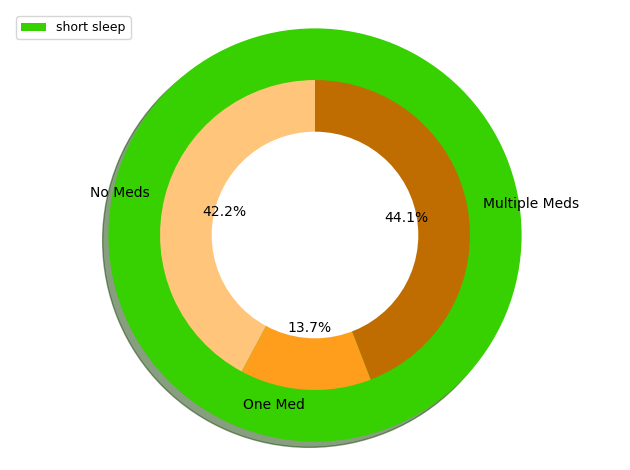

In [350]:
# Data to plot
short_labels = ['short sleep']
short_label_sizes = [sum_short]
short_labels_rx = ['No Meds','One Med','Multiple Meds']
short_sizes_rx = [len(zero_short), len(one_short), len(morethanone_short),
            ]
short_colors_rx = ['#ffc57a','#ff9e1d', '#bf6d00']
green = ['#37d000']

# Plot
plt.pie(short_label_sizes, colors=green, startangle=90, frame=True, shadow=True)
plt.pie(short_sizes_rx, labels=short_labels_rx, colors=short_colors_rx, autopct='%1.1f%%', radius=0.75, startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(short_labels, fontsize=9, loc = "upper left")
plt.axis('equal')
plt.tight_layout()
plt.show()

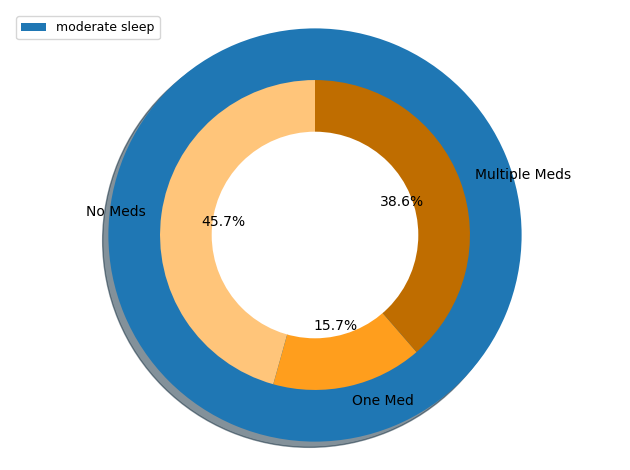

In [351]:
# Data to plot
mod_labels = ['moderate sleep']
mod_label_sizes = [sum_moderate]
mod_labels_rx = ['No Meds','One Med','Multiple Meds']
mod_sizes_rx = [len(zero_mod), len(one_mod), len(morethanone_mod),
            ]
mod_colors_rx = ['#ffc57a','#ff9e1d', '#bf6d00']

# Plot
plt.pie(mod_label_sizes, startangle=90, frame=True, shadow=True)
plt.pie(mod_sizes_rx, labels=mod_labels_rx, colors=mod_colors_rx, autopct='%1.1f%%', radius=0.75, startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(mod_labels, fontsize=9, loc = "upper left")
plt.axis('equal')
plt.tight_layout()
plt.show()

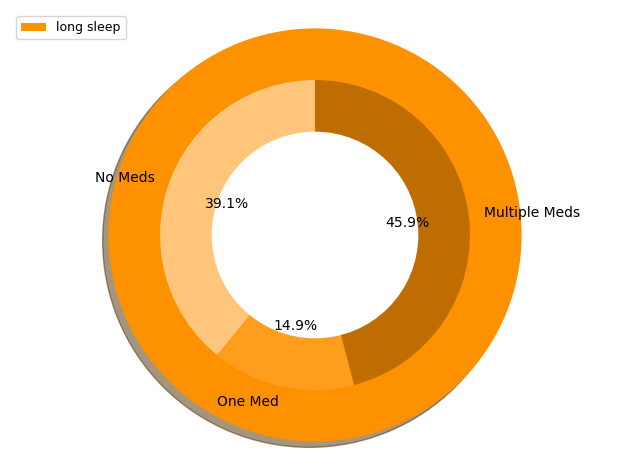

In [352]:
# Data to plot
long_labels = ['long sleep']
long_label_sizes = [sum_long]
long_labels_rx = ['No Meds','One Med','Multiple Meds']
long_sizes_rx = [len(zero_long), len(one_long), len(morethanone_long),
            ]
long_colors_rx = ['#ffc57a','#ff9e1d', '#bf6d00']
orange = ['#fd9100']

# Plot
plt.pie(long_label_sizes, colors=orange, startangle=90, frame=True, shadow=True)
plt.pie(long_sizes_rx, labels=long_labels_rx, colors=long_colors_rx, autopct='%1.1f%%', radius=0.75, startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(long_labels, fontsize=9, loc = "upper left")
plt.axis('equal')
plt.tight_layout()
plt.show()

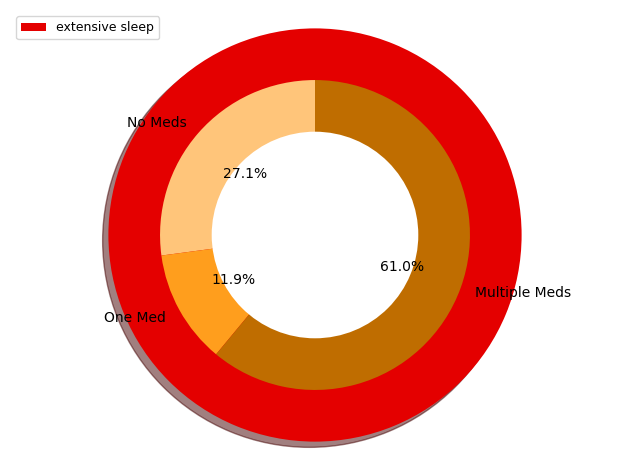

In [353]:
# Data to plot
ext_labels = ['extensive sleep']
ext_label_sizes = [sum_extensive]
ext_labels_rx = ['No Meds','One Med','Multiple Meds']
ext_sizes_rx = [len(zero_ext), len(one_ext), len(morethanone_ext),
            ]
ext_colors_rx = ['#ffc57a','#ff9e1d', '#bf6d00']
red = ['#e40000']

# Plot
plt.pie(ext_label_sizes, colors=red, startangle=90, frame=True, shadow=True)
plt.pie(ext_sizes_rx, labels=ext_labels_rx, colors=ext_colors_rx, autopct='%1.1f%%', radius=0.75, startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ext_labels, fontsize=9, loc = "upper left")
plt.axis('equal')
plt.tight_layout()
plt.show()

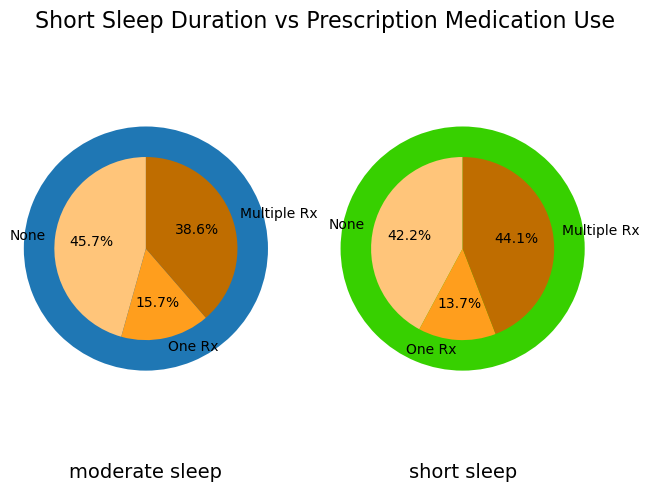

In [354]:
# Tried using the plt.subplots() to plot pie charts side by side
# Data to plot
mod_labels = ['moderate sleep']
short_labels = ['short sleep']
mod_label_sizes = [sum_moderate]
short_label_sizes = [sum_short]
all_labels_rx = ['None','One Rx','Multiple Rx']
mod_sizes_rx = [len(zero_mod), len(one_mod), len(morethanone_mod),
            ]

short_sizes_rx = [len(zero_short), len(one_short), len(morethanone_short),
            ]
all_colors_rx = ['#ffc57a','#ff9e1d', '#bf6d00']

green = ['#37d000']

fig1, ax1 = plt.subplots(1,2, constrained_layout = True)

ax1[0].pie(mod_label_sizes, startangle=90, frame=True)
ax1[0].pie(mod_sizes_rx, labels=all_labels_rx, colors=all_colors_rx, autopct='%1.1f%%', radius=0.75, startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)

ax1[1].pie(short_label_sizes, colors=green, startangle=90, frame=True)
ax1[1].pie(short_sizes_rx, labels=all_labels_rx, colors=all_colors_rx, autopct='%1.1f%%', radius=0.75, startangle=90)
centre_circle = plt.Circle((0,1),0.5,color='black', fc='white',linewidth=0)

ax1[0].axis('equal')
ax1[0].set_xlabel('moderate sleep', fontsize=14)

ax1[1].axis('equal')
ax1[1].set_xlabel('short sleep', fontsize=14)
fig1.suptitle('Short Sleep Duration vs Prescription Medication Use', fontsize=16)
                                                                                                                                     
plt.show()

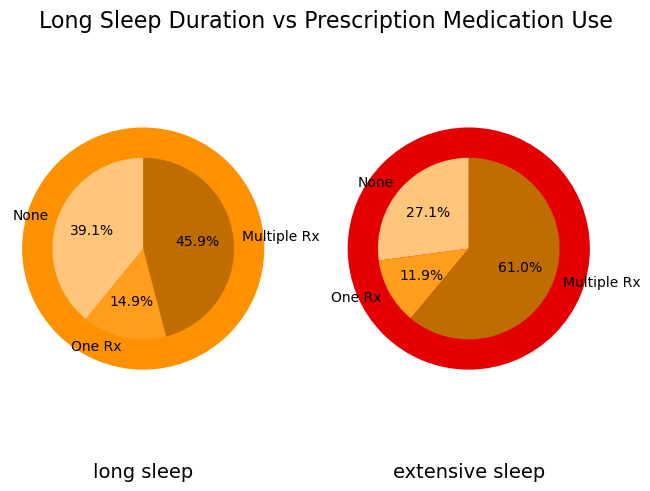

In [355]:
all_labels_rx = ['None','One Rx','Multiple Rx']
long_labels = ['long sleep']
ext_labels = ['extensive sleep']
long_label_sizes = [sum_long]
ext_label_sizes = [sum_extensive]
long_sizes_rx = [len(zero_long), len(one_long), len(morethanone_long),
            ]
ext_sizes_rx = [len(zero_ext), len(one_ext), len(morethanone_ext),
            ]
all_colors_rx = ['#ffc57a','#ff9e1d', '#bf6d00']
orange = ['#fd9100']
red = ['#e40000']
fig2, ax1 = plt.subplots(1,2, constrained_layout = True)
ax1[0].pie(long_label_sizes, colors=orange, startangle=90, frame=True)
ax1[0].pie(long_sizes_rx, labels=all_labels_rx, colors=all_colors_rx, autopct='%1.1f%%', radius=0.75, startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
ax1[1].pie(ext_label_sizes, colors=red, startangle=90, frame=True)
ax1[1].pie(ext_sizes_rx, labels=all_labels_rx, colors=all_colors_rx, autopct='%1.1f%%', radius=0.75, startangle=90)
centre_circle = plt.Circle((0,1),0.5,color='black', fc='white',linewidth=0)

ax1[0].axis('equal')
ax1[0].set_xlabel('long sleep', fontsize=14)
ax1[1].axis('equal')
ax1[1].set_xlabel('extensive sleep', fontsize=14)
fig2.suptitle('Long Sleep Duration vs Prescription Medication Use', fontsize=16)
                                                                                                                                     
plt.show()

## Statistical Analysis

In [356]:
# Perform chi square test to determine if difference between % of respondents in the extensive sleepers group taking multiple medications 
#compared to the other three groups is statistically significant 

# Expected data in the NHANES survey can be calulated by averaging the %s across all three medication categories for the respondents reporting short, moderate and long sleep patterns
exp_zero = (((len(zero_short) / sum_short)) + (len(zero_mod) / sum_moderate) + ((len(zero_long) / sum_long))) / 3 
exp_one = (((len(one_short) / sum_short)) + (len(one_mod) / sum_moderate) + ((len(one_long) / sum_long))) / 3 
exp_multiple = (((len(morethanone_short) / sum_short)) + (len(morethanone_mod) / sum_moderate) + ((len(morethanone_long) / sum_long))) / 3 

# Observed data are the %s observed for the extensive sleeper group
obs_zero = (len(zero_ext) / sum_extensive)
obs_one = (len(one_ext) / sum_extensive)
obs_multiple = (len(morethanone_ext) / sum_extensive)

observed = pd.Series([obs_zero, obs_one, obs_multiple], index=["None", "One", "Multiple Rx"]) 
df = pd.DataFrame([observed]).T
df[1] = pd.Series([exp_zero, exp_one, exp_multiple], index=["None", "One", "Multiple Rx"])
df.columns = ["observed", "expected"]

# The degree of freedom is (r-1)(c-1) = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [357]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=0.13682868524633926, pvalue=0.9338734498276227)

### Conclusion#### Since the chi square value is not above the critical value and the p-value is higher than 0.05, we conclude that the results are NOT statistically significant.